# Introduction 

This project aims to predict whether patients in a dataset (Pima Indians Diabetes Database) have diabetes or not using three machine learning algorithms: Logistic
Regression, Random Forest, and Gradient Boosting. Common evaluation metrics like accuracy,
recall, precision, and F1-score will be used in comparing the performances of these algorithms.
This project is structured in this way to help understand how the healthcare industry could
benefit from machine learning techniques in improving health outcomes especially with early
detection.

According to the Centers for Disease Control and Prevention, 38.4 million people of all ages—or
11.6% of the U.S. population—had diabetes, which can result in complications such as
hospitalizations, kidney disease, vision impairment, and even death ("National Diabetes
Statistics Report"). Hence, early detection can help reduce these complications and improve
patients’ outcomes. Therefore by comparing the different algorithms, we aim to determine the
most effective techniques for this crucial task.


This project will include steps for exploratory data analysis (EDA), data cleaning, model training with cross-validation and hyperparameter tuning, model evaluation, and feature importance analysis

In [5]:
# Importing the necessary libraries and loading the data 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis 

Initial exploration of the data to provide summary statistics, check for missing values, visualize the relationships and check for outliers  

In [6]:
# Summary statistics of diabetes df 
diabetes_df.info()
diabetes_df.describe()

# Checking for missing values 
diabetes_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

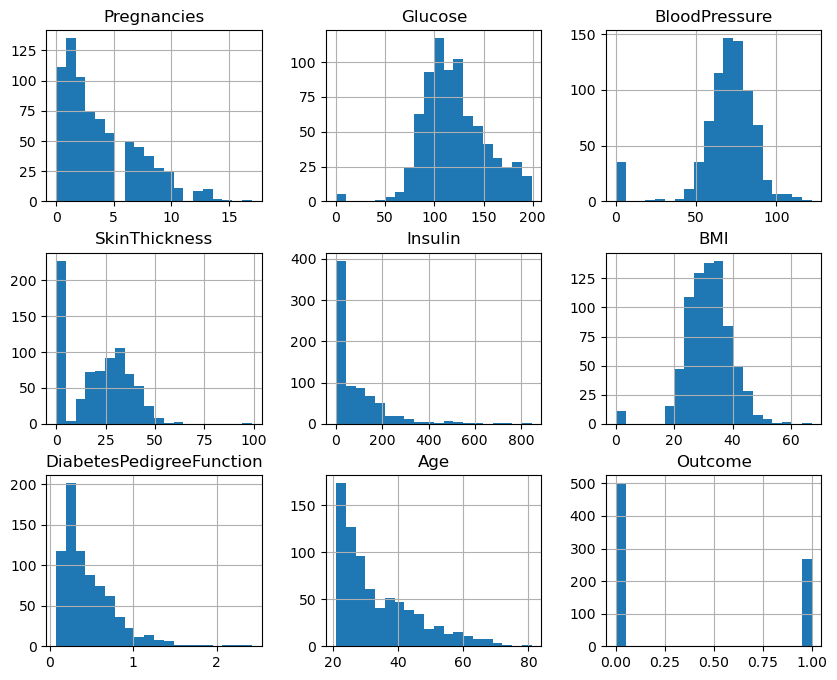

In [12]:
#Plotting Histogram gor numerical feature 
diabetes_df.hist(bins=20, figsize=(10, 8))
plt.show()


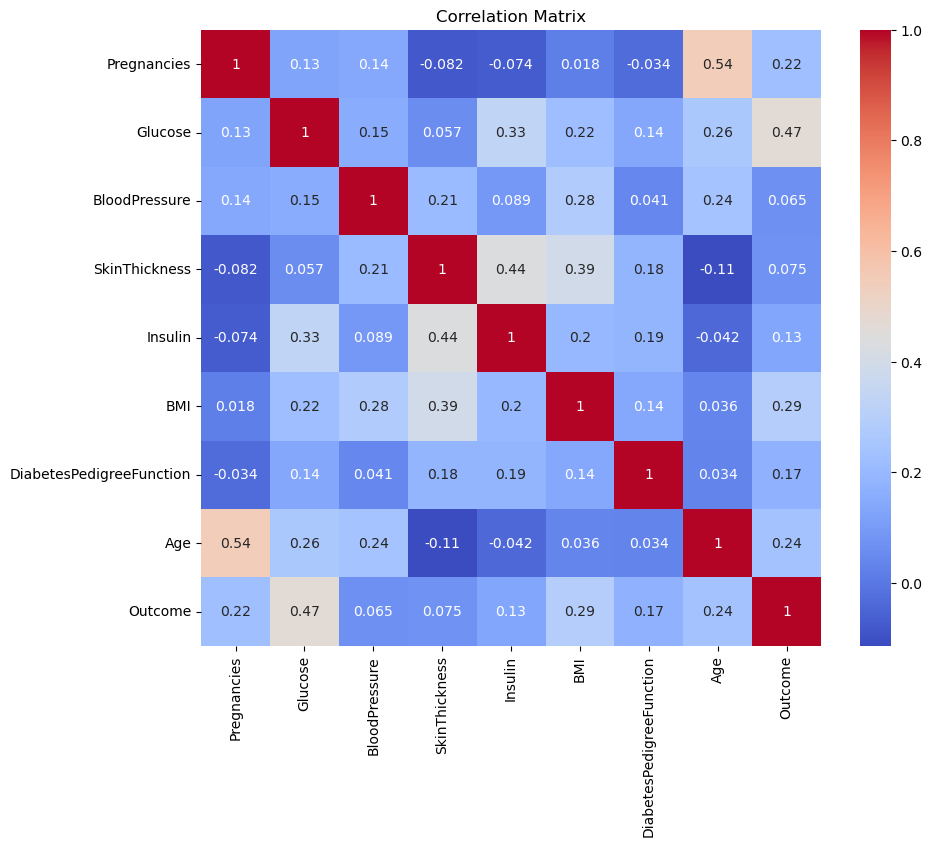

In [13]:
#Plotting the correlation marix and visualizing
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

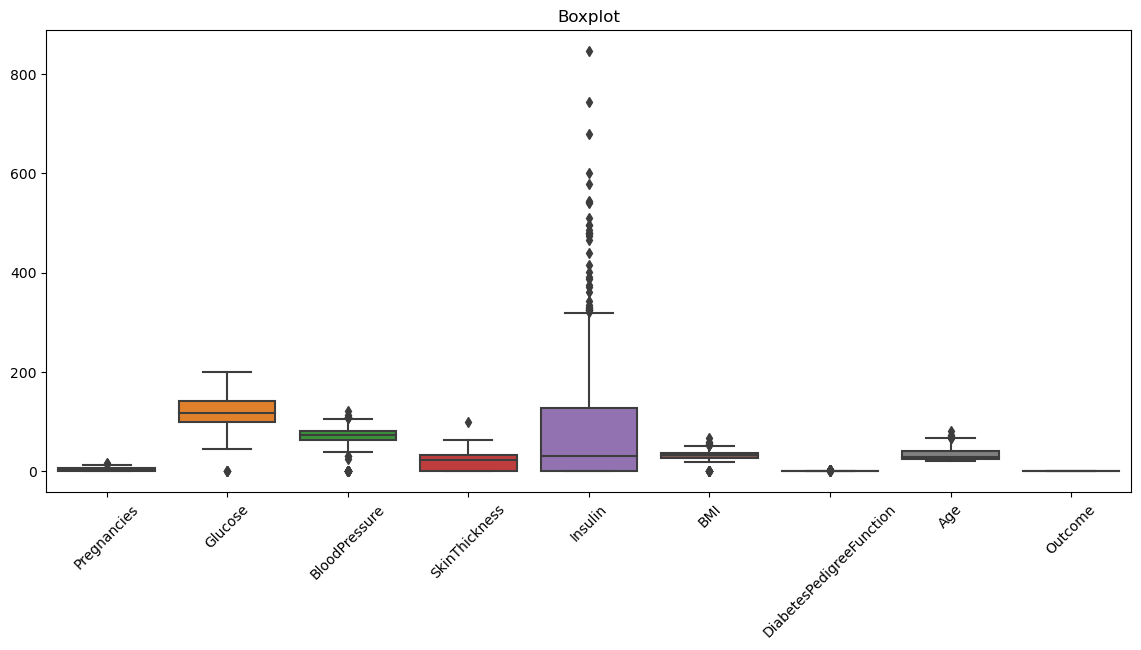

In [14]:
# Boxplot to check for outliers 
plt.figure(figsize=(14, 6))
sns.boxplot(data=diabetes_df)
plt.title('Boxplot')
plt.xticks(rotation=45)
plt.show()


# Data Preparation and Cleaning

While there were no missing values, zero values present in features like Glucose, Insulin, BloodPressure, SkinThickness, and BMI cannot be physiologically possible so there need to be treated as missing values and iteratively imputed. The numerical features will also be scaled. 

In [16]:
# Redifining columns where zero values is not a plausible value and replacing them with Nan
columns_zero = ['Glucose', 'BMI', 'SkinThickness', 'Insulin', 'BloodPressure']
diabetes_df[columns_zero] = diabetes_df[columns_zero].replace(0, np.nan)

# Checking for new missing value count
diabetes_df[columns_zero].isnull().sum()

Glucose            5
BMI               11
SkinThickness    227
Insulin          374
BloodPressure     35
dtype: int64

In [18]:
#Instantiating and applying the Iterative Imputer 
iterative_imputer = IterativeImputer(random_state=42)
diabetes_df[columns_zero] = iterative_imputer.fit_transform(diabetes_df[columns_zero])

#Checking to see missing values after imputation 
diabetes_df[columns_zero].isnull().sum()

Glucose          0
BMI              0
SkinThickness    0
Insulin          0
BloodPressure    0
dtype: int64

In [19]:
#Separating the input features and target variable 
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Scaling the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Training 

Before model training, the dataset will be split into training and test set. Then each training set will be used to train the three different machine learning algorithms. Each algorithm's hyperparameter will be tuned using GridSearch. 

In [20]:
# Splitting the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression 

In [24]:
#Logistic Regression with GridSearch for the regularization parameter C
lr = LogisticRegression(solver='liblinear', random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='recall')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
grid_lr.best_params_

{'C': 0.01}

### Random Forest 

In [25]:
#Random Forest with GridSearch for the number of estimators and max_depth
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200],'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
grid_rf.best_params_

{'max_depth': 10, 'n_estimators': 50}

### Gradient Boosting

In [26]:
# Gradient Boosting with GridSearch for learning_rate and n_estimators
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 0.2]}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='recall')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
grid_gb.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

## Model Evaluation 

Models will be evaluated using accuracy, recall, precision, and F1-score. Additionally, confusion matrices will be used to showcase the key differences in performance across the metric


Accuracy:  0.7143
Recall:    0.5926
Precision: 0.5926
F1-Score:  0.5926


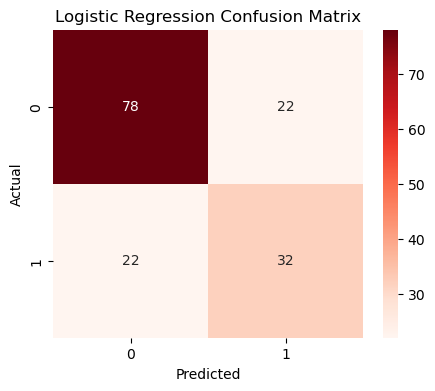

In [40]:
# Logistic Regression Predictions 
y_pred_lr = best_lr.predict(X_test)

# Evaluation metrics 
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

#Performance scores for logistic regression 
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")

#Confusion Matrix 
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy:  0.7273
Recall:    0.5556
Precision: 0.6250
F1-Score:  0.5882


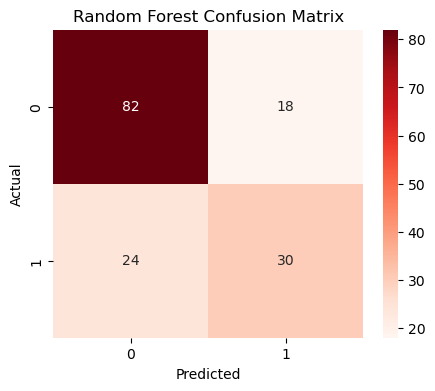

In [41]:
# Random Forest Predictions 
y_pred_rf = best_rf.predict(X_test)

# Evaluation metrics 
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Performance scores for logistic regression 
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")


#Confusion Matrix 
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy:  0.7273
Recall:    0.5926
Precision: 0.6154
F1-Score:  0.6038


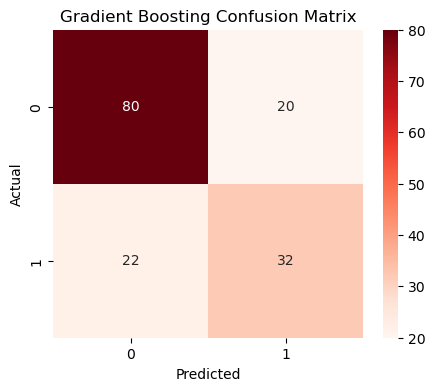

In [42]:
# Gradient Boosting Predictions 
y_pred_gb = best_gb.predict(X_test)

# Evaluation metrics 
accuracy_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

#Performance scores for logistic regression 
print(f"Accuracy:  {accuracy_gb:.4f}")
print(f"Recall:    {recall_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"F1-Score:  {f1_gb:.4f}")

#Confusion Matrix 
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Reds')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Computing the performance metrics for each model in a single DataFrame
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_gb],
    'Recall': [recall_lr, recall_rf, recall_gb],
    'Precision': [precision_lr, precision_rf, precision_gb],
    'F1-Score': [f1_lr, f1_rf, f1_gb]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.714286,0.592593,0.592593,0.592593
1,Random Forest,0.727273,0.555556,0.625000,0.588235
2,Gradient Boosting,0.727273,0.592593,0.615385,0.603774


## Analysis of Feature Importance

This is to provide insight to show which feature contributes the most in the prediction of diabetes. To analyze feature importance, coefficients will be used as a metric for Logistic Regression while feature_importance will be used for Random Forest and Gradient Boosting. Also, the order of feature important will be visualized of easier insights 

In [44]:
#Logistic Regression coefficients
feature_names = X.columns
coeficient_lr = best_lr.coef_[0]
importance_lr = pd.Series(coeficient_lr, index=feature_names).sort_values(ascending=False)
print("Logistic Regression Coefficients:")
print(importance_lr)

Logistic Regression Coefficients:
Glucose                     0.464453
BMI                         0.249817
Insulin                     0.220550
Pregnancies                 0.167051
SkinThickness               0.141270
Age                         0.126410
DiabetesPedigreeFunction    0.125684
BloodPressure               0.069275
dtype: float64


In [45]:
# Random Forest feature importance
importance_rf = pd.Series(best_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(importance_rf)

Random Forest Feature Importances:
Glucose                     0.223534
Insulin                     0.177407
BMI                         0.142596
DiabetesPedigreeFunction    0.109357
Age                         0.108456
SkinThickness               0.095273
Pregnancies                 0.075619
BloodPressure               0.067758
dtype: float64


In [47]:
# Gradient Boosting feature importance
importance_gb = pd.Series(best_gb.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Gradient Boosting Feature Importances:")
print(importance_gb)


Gradient Boosting Feature Importances:
Glucose                     0.328996
BMI                         0.151346
Insulin                     0.146751
DiabetesPedigreeFunction    0.128621
Age                         0.093442
Pregnancies                 0.072064
SkinThickness               0.051606
BloodPressure               0.027175
dtype: float64


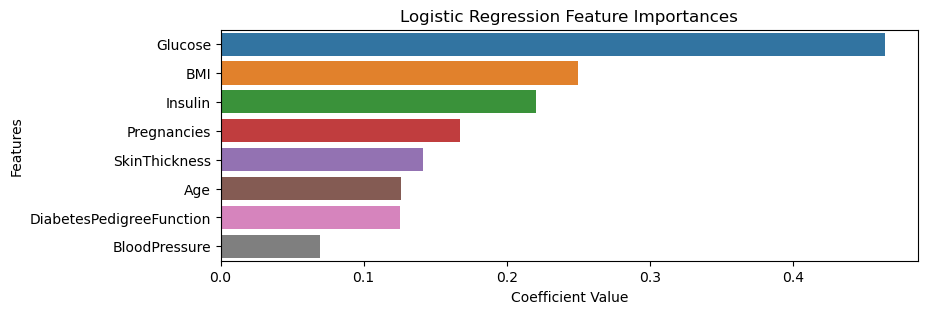

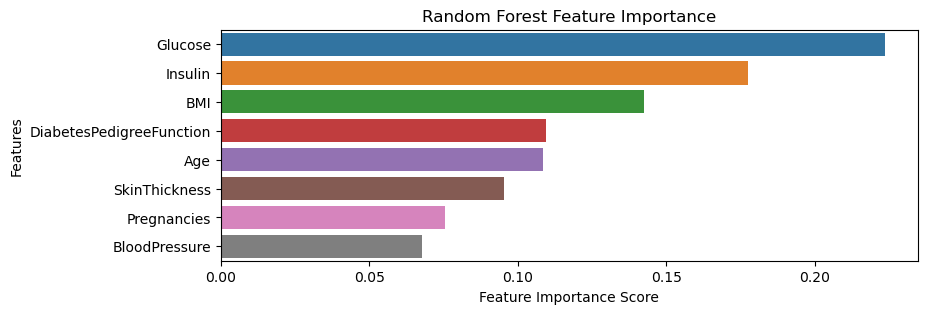

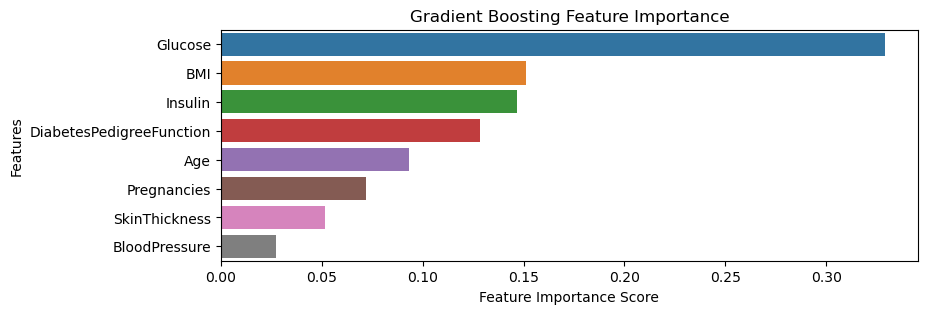

In [50]:
# Visualizing Logistic Regression Coefficients
plt.figure(figsize=(9, 3))
sns.barplot(x=importance_lr.values, y=importance_lr.index)
plt.title("Logistic Regression Feature Importances")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# Visualizing Random Forest Feature Importances
plt.figure(figsize=(9, 3))
sns.barplot(x=importance_rf.values, y=importance_rf.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# Visualize Gradient Boosting Feature Importances
plt.figure(figsize=(9, 3))
sns.barplot(x=importance_gb.values, y=importance_gb.index)
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# User interface Integration 



In [52]:
pip install streamlit

ERROR: Could not find a version that satisfies the requirement streamlit (from versions: none)
ERROR: No matching distribution found for streamlit
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import streamlit as st
import pickle